<a href="https://colab.research.google.com/github/throwmen/PythonDataScience/blob/main/Caso2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CASO 2: ENTIDAD FINANCIERA**
#
#Paso 1: Entendimiento del negocio
#
Una entidad financiera quiere hacer una estrategia de atracción para que los clientes adquieran una segunda tarjeta. Para desarrollar esa estrategia necesitan entender el comportamiento del cliente.

# Paso 2: Enfoque Analítico
#
Se propone construir un modelo de agrupamiento (clustering) que permita segmentar a los clientes en grupos con comportamientos similares. A partir de esos grupos se identifican perfiles accionables para soportar la estrategia comercial de segunda tarjeta.

# Paso 3: Requerimientos de datos
#
- Uso y perfil transaccional de compras
- Uso de liquidez (avances en efectivo)
- Capacidad de crédito y saldo
- Comportamiento de pago
- Relación con el producto y riesgo

#Paso 4: Recoleccion de datos
#
- CUST_ID: identificador del cliente
- BALANCE: Monto restante en su cuenta de ahorros para hacer compras
- BALANCE_FREQUENCY: Relación del riesgo del cliente (valor entre 0 y 1)
- PURCHASES: Monto de compras realizado
- ONEOFF_PURCHASES: Máximo de compras realizadas en una sola cuota
- INSTALLMENTS_PURCHASES: Monto de compras realizadas a crédito
- CASH_ADVANCE: Monto de avances en efectivo
- PURCHASES_FREQUENCY: Calificación de la frecuencia de compras (valor entre 0 y 1)
- ONEOFFPURCHASESFREQUENCY: Calificación de la frecuencia de compras a una sola cuota (valor entre 0 y 1)
- PURCHASESINSTALLMENTSFREQUENCY: Calificación de la frecuencia de compras a crédito (valor entre 0 y 1)
- CASHADVANCEFREQUENCY: Calificación de la frecuencia de avances (valor entre 0 y 1)
- CASHADVANCETRX: Número de transacciones realizadas con avances
- PURCHASES_TRX: Número de transacciones de compras hechas
- CREDIT_LIMIT: Límite de crédito
- AYMENTS: Monto de pagos
- MINIMUM_PAYMENTS: Monto mínimo de pagos
- PRCFULLPAYMENT: Porcentaje de pagos completos hechos por el usuario
- TENURE: Tenencia de tarjetas de crédito
#
#Paso 5:
- Identificación de datos nulos
- Revisión de valores atípicos (outliers)
- Selección de variables
- Evaluación de multicolinealidad / redundancia

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/datos_caso_2.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#Identificación de datos Nulos

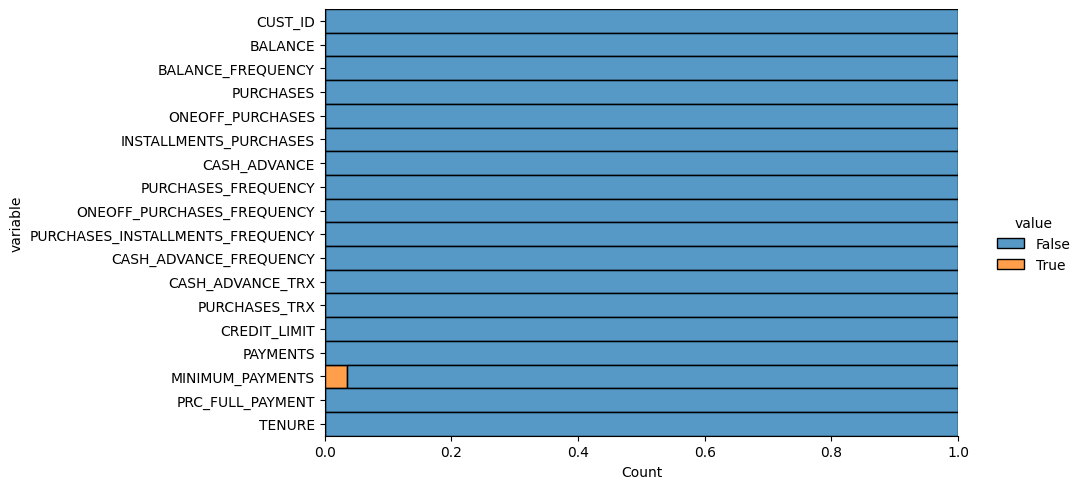

In [ ]:
data.isnull().melt().pipe(lambda df: sb.displot(data=df, y = 'variable', hue = 'value', multiple ='fill', aspect =2))

In [ ]:
# --- Chequeo básico: tipos, nulos, conteo por tipo y duplicados ---
def chequeo_basico(df: pd.DataFrame):
    # 1) Tipo de datos por columna
    print("=== Tipos de datos por columna ===")
    print(df.dtypes.sort_index())

    # 2) ¿Cuántas columnas hay por cada tipo de dato?
    print("\n=== Conteo de columnas por tipo de dato ===")
    print(df.dtypes.value_counts())

    # 3) Nulos (por columna y total)
    print("\n=== Nulos por columna (desc) ===")
    na_counts = df.isna().sum().sort_values(ascending=False)
    print(na_counts)
    print("\n¿Hay nulos en el DataFrame?:", df.isna().any().any())
    print("Total de nulos en el DataFrame:", int(df.isna().sum().sum()))

    # 4) Duplicados
    dup_count = df.duplicated().sum()
    print("\n=== Duplicados ===")
    print("Filas duplicadas (exactas):", dup_count)
    if dup_count > 0:
        print("Porcentaje de filas duplicadas: {:.2f}%".format(100 * df.duplicated().mean()))
chequeo_basico(data)

=== Tipos de datos por columna ===
BALANCE                             float64
BALANCE_FREQUENCY                   float64
CASH_ADVANCE                        float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
CREDIT_LIMIT                        float64
CUST_ID                              object
INSTALLMENTS_PURCHASES              float64
MINIMUM_PAYMENTS                    float64
ONEOFF_PURCHASES                    float64
ONEOFF_PURCHASES_FREQUENCY          float64
PAYMENTS                            float64
PRC_FULL_PAYMENT                    float64
PURCHASES                           float64
PURCHASES_FREQUENCY                 float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
PURCHASES_TRX                         int64
TENURE                                int64
dtype: object

=== Conteo de columnas por tipo de dato ===
float64    14
int64       3
object      1
Name: count, dtype: int64

=== Nulos por columna (desc) ===
MINIMUM_PAYM

In [ ]:
# Eliminación de filas nulas
data.dropna(inplace=True)

#Revisión de valores atÍpicos

1.   Elemento de lista
2.   Elemento de lista



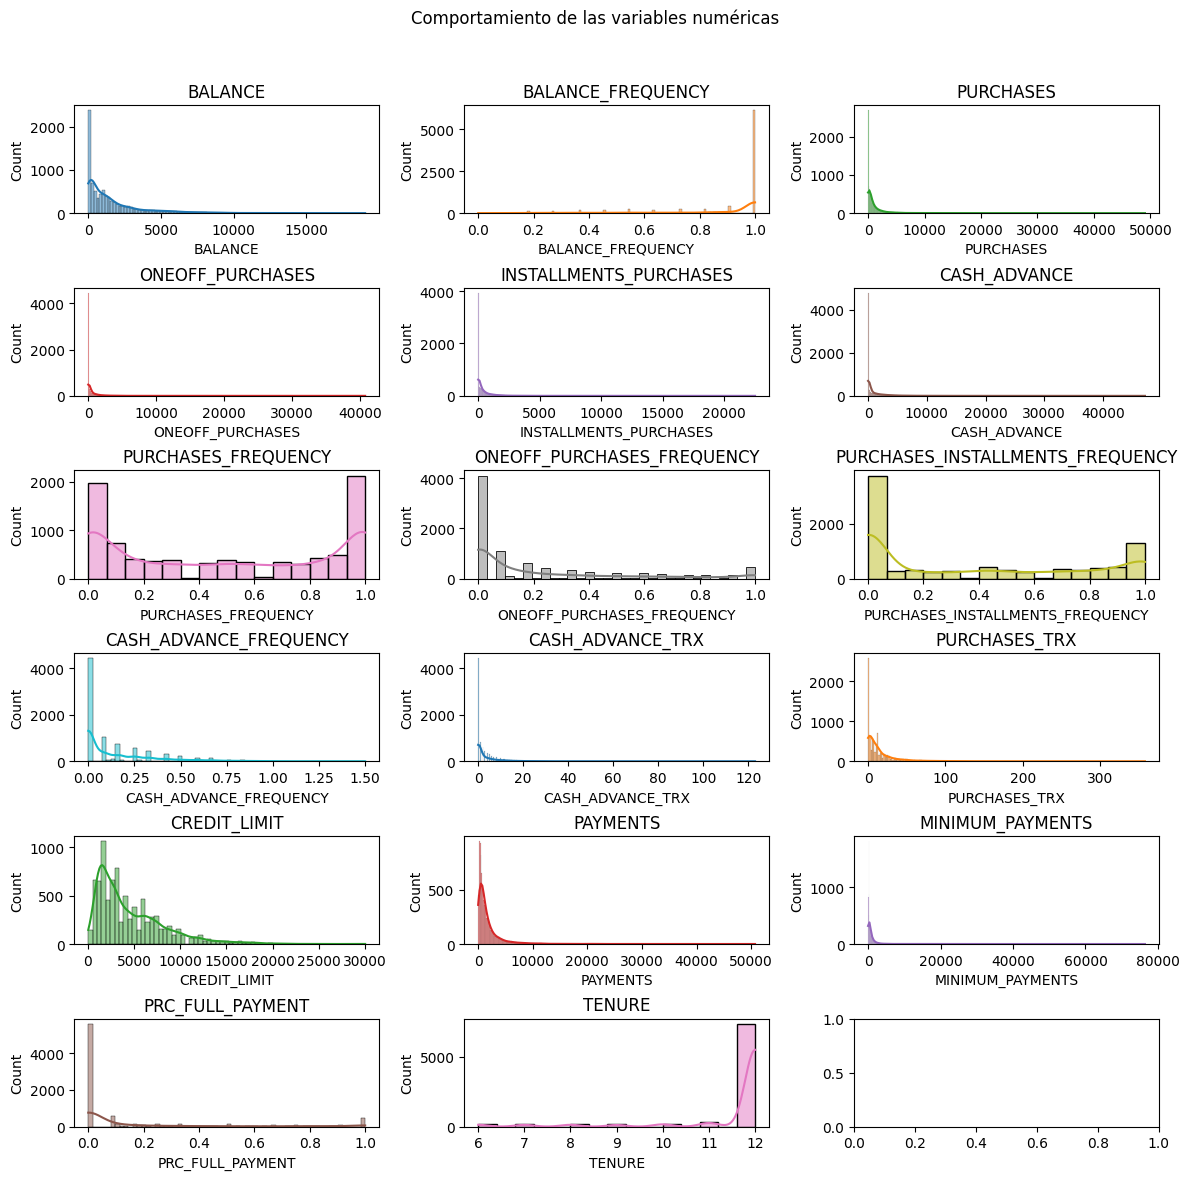

In [ ]:
#Construir los histogramas de frecuencia para todas las variables numéricas
fig, ax = plt.subplots(6, 3, figsize = (12,12))
ax = ax.flat
num_col = data.select_dtypes(include = ['float64', 'int64']).columns
for i, col in enumerate(num_col):
  sb.histplot(data = data, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
  ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de las variables numéricas')
plt.show()

#INTERPRETACIÓN
#
BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PAYMENTS, MINIMUM_PAYMENTS, CREDIT_LIMIT
#
Se ve que la mayoría de clientes está en valores bajos, pero hay pocos clientes con valores extremadamente altos (cola larga).
#
hay muchos clientes normales y pocos  de alto consumo
#
##**Mucha gente no usa avances en efectivo**
#
CASH_ADVANCE y CASH_ADVANCE_TRX

La masa está pegada a 0 (o muy cerca).
la mayoría no usa avances; un grupo pequeño sí los usa bastante → ahí aparece un cluster natural tipo “usuarios de liquidez”.
#
##**Frecuencia de compras con forma en U**
**PURCHASES_FREQUENCY**

Hay mucha gente cerca de 0 y mucha cerca de 1.

 dos comportamientos claros:

clientes que casi no compran con la tarjeta,

clientes que compran muy frecuentemente.
Frecuencia de one-off (una cuota) muy concentrada en valores bajos

##**ONEOFF_PURCHASES_FREQUENCY**

Mucho peso cerca de 0 y una cola hacia valores mayores.

 muchos clientes no compran “one-off” frecuentemente, y un grupo menor sí.

##**Cuotas vs. una cuota: posible diferenciación clara**

**PURCHASES_INSTALLMENTS_FREQUENCY**

Se ve concentración fuerte cerca de 0, pero también valores altos (cerca de 1).

 hay clientes que casi nunca compran a cuotas y otros que sí lo hacen con frecuencia, lo cual ayuda a separar “cuoteros” vs “no cuoteros”.

##**Porcentaje de pago total: extremos muy marcados**

**PRC_FULL_PAYMENT**

Muchísima gente cerca de 0 y también un pico cerca de 1.

dos perfiles potentes:

pagadores mínimos / no pagan todo (posible revolvente),

pagadores totales (transaccionales).

Esto es oro para segmentar y diseñar la oferta de segunda tarjeta (beneficios vs. tasas vs. cupos).

#*Antigüedad (TENURE) muy concentrada cerca de 12**

**TENURE**

Pico fuerte alrededor de 12




# **Análisis adicional**
La variable Tenure es de tipo discreto. Aunque podría tratarse como una variable categórica, resulta más adecuado considerarla como una variable numérica debido a su significado. Un mayor valor de Tenure representa una diferencia cuantitativa real, lo cual implica un impacto distinto en comparación con el tratamiento de la variable como categórica, donde solo se considerarían grupos sin tener en cuenta la magnitud de la diferencia entre valores.

Otro tema a tratar son los rangos de las variables. Se tienen unos mínimos y máximos teóricos, y existe una variable en particular que no los cumple.

In [ ]:
print("Número de filas que se salen del rango teórico")
print("BALANCE_FREQUENCY: " + str(data[(data['BALANCE_FREQUENCY'] < 0) | (data['BALANCE_FREQUENCY'] > 1)].shape[0]))
print("PURCHASES_FREQUENCY: " + str(data[(data['PURCHASES_FREQUENCY'] < 0) | (data['PURCHASES_FREQUENCY'] > 1)].shape[0]))
print("ONEOFF_PURCHASES_FREQUENCY: " + str(data[(data['ONEOFF_PURCHASES_FREQUENCY'] < 0) | (data['ONEOFF_PURCHASES_FREQUENCY'] > 1)].shape[0]))
print("PURCHASES_INSTALLMENTS_FREQUENCY: " + str(data[(data['PURCHASES_INSTALLMENTS_FREQUENCY'] < 0) | (data['PURCHASES_INSTALLMENTS_FREQUENCY'] > 1)].shape[0]))
print("CASH_ADVANCE_FREQUENCY: " + str(data[(data['CASH_ADVANCE_FREQUENCY'] < 0) | (data['CASH_ADVANCE_FREQUENCY'] > 1)].shape[0]))
print("PRC_FULL_PAYMENT: " + str(data[(data['PRC_FULL_PAYMENT'] < 0) | (data['PRC_FULL_PAYMENT'] > 1)].shape[0])) # Porcentaje entre 0 y 1

Número de filas que se salen del rango teórico
BALANCE_FREQUENCY: 0
PURCHASES_FREQUENCY: 0
ONEOFF_PURCHASES_FREQUENCY: 0
PURCHASES_INSTALLMENTS_FREQUENCY: 0
CASH_ADVANCE_FREQUENCY: 8
PRC_FULL_PAYMENT: 0


In [ ]:
data.shape

(8636, 18)

In [ ]:
# Como CASH_ADVANCE_FREQUENCY tiene 8 registros con valores erróneos, se procede a eliminar estas filas puesto que se consideran datos perjudiciales para el modelo
data = data[(data['CASH_ADVANCE_FREQUENCY'] >= 0) & (data['CASH_ADVANCE_FREQUENCY'] <= 1)]

In [ ]:
data.shape

(8628, 18)

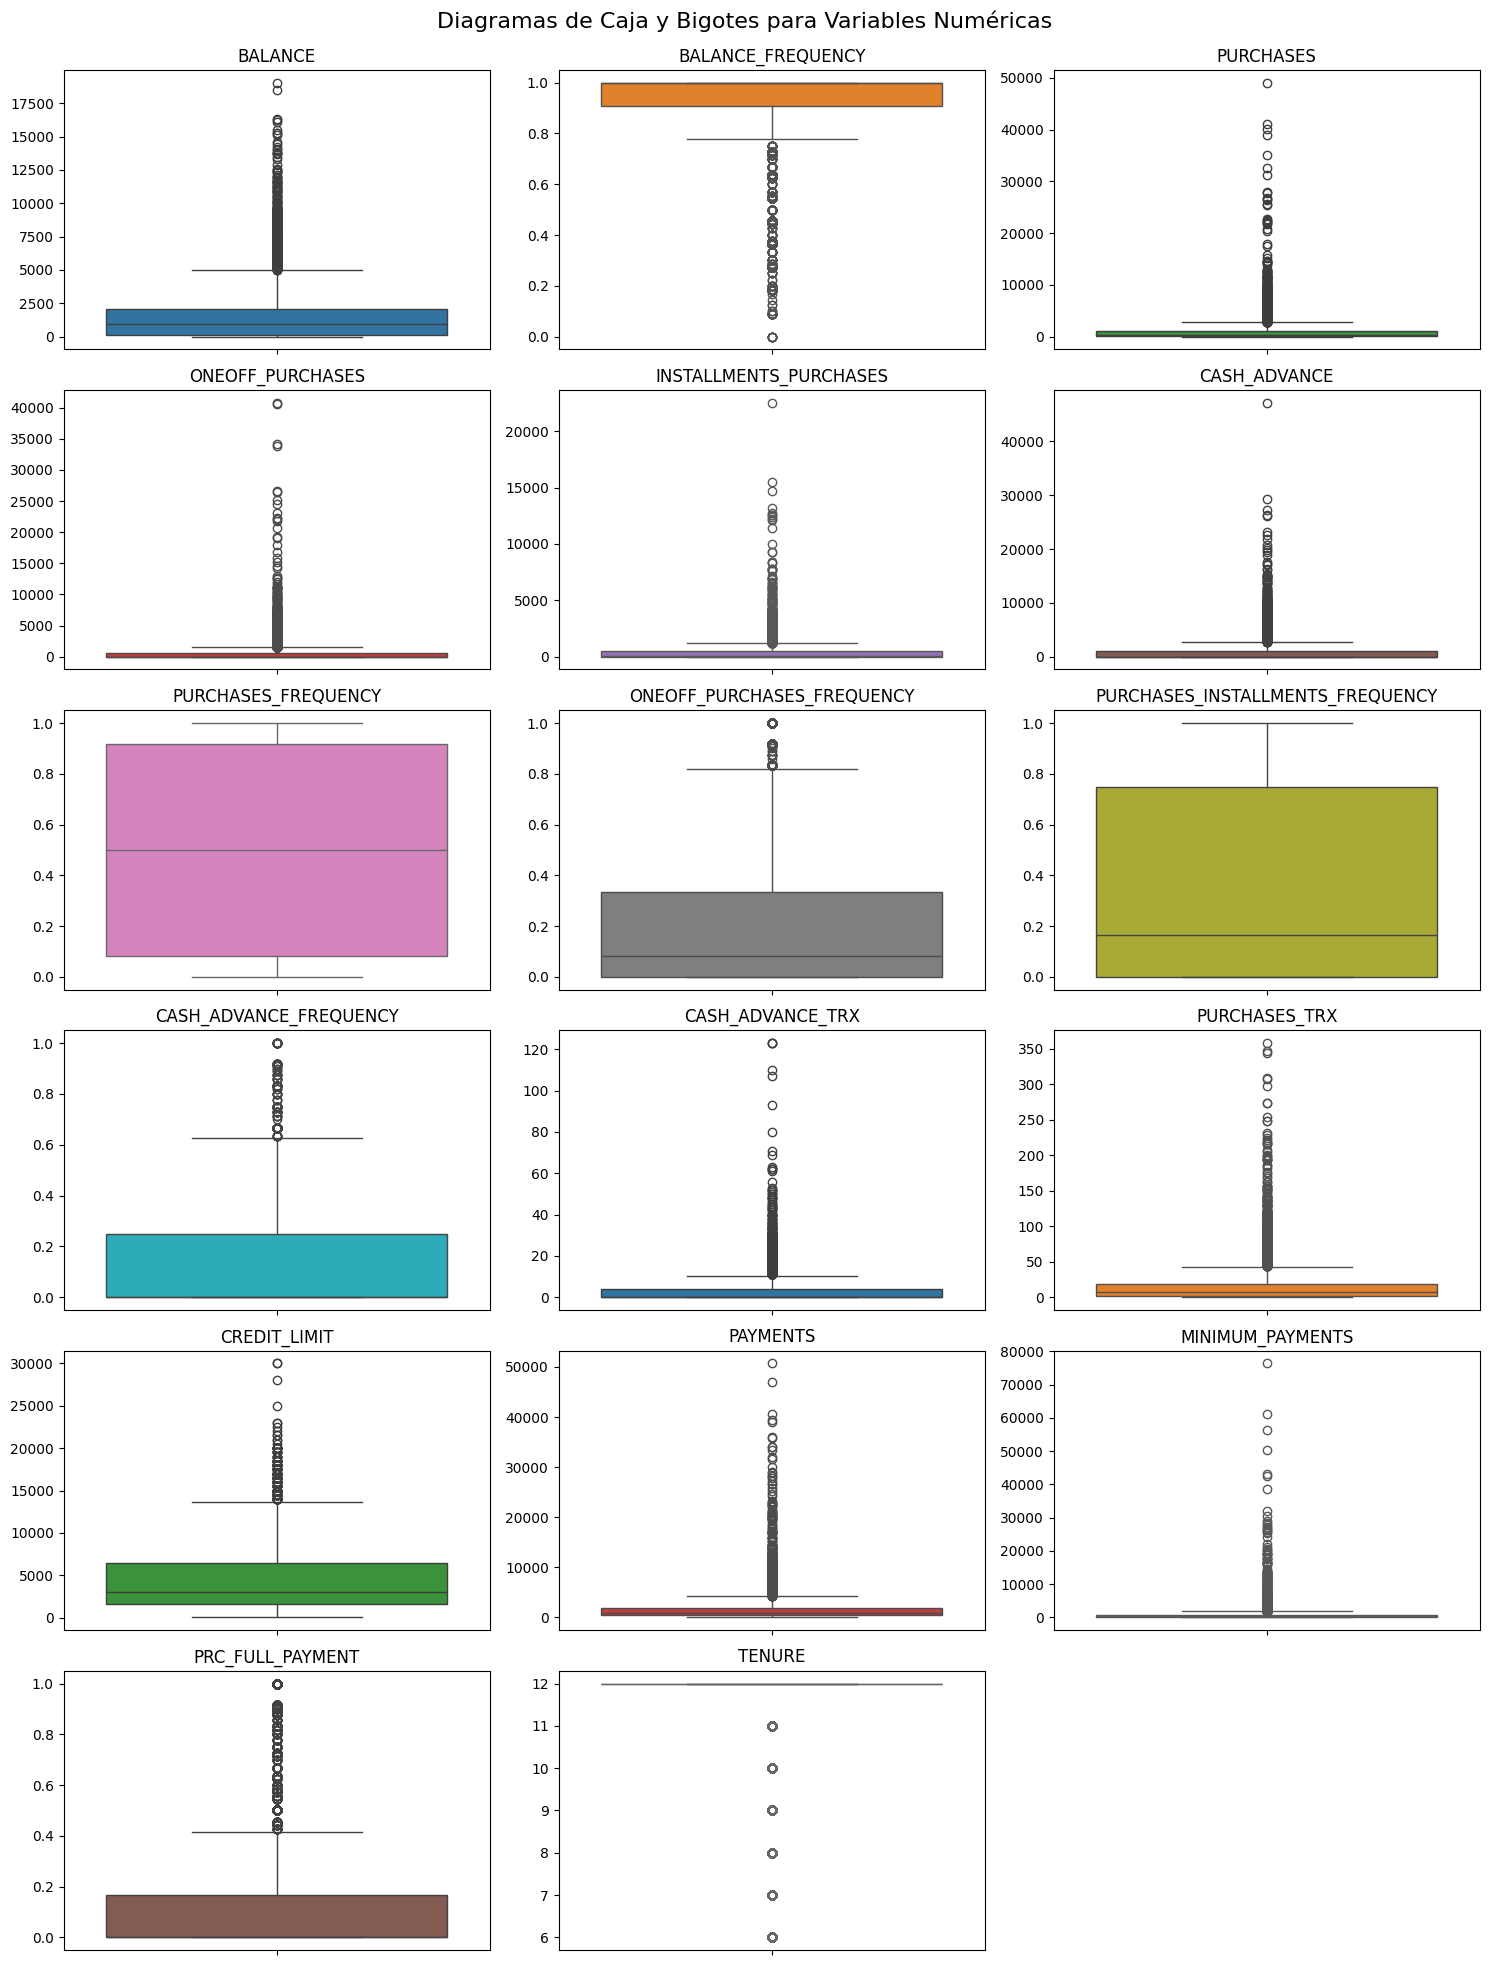

In [ ]:
num_col = data.select_dtypes(include = ['float64', 'int64']).columns
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
ax = ax.flatten() # Para poder iterar sobre un array 1D

for i, col in enumerate(num_col):
    sb.boxplot(y=data[col], ax=ax[i], color=(list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'])
    ax[i].set_title(col)
    ax[i].set_ylabel('') # Remover el ylabel para evitar aglomeración

# Ocultar los ejes vacíos si hay más subplots que columnas
for j in range(len(num_col), len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Diagramas de Caja y Bigotes para Variables Numéricas', fontsize=16)
plt.show()

## **Tratamiento de valores atípicos**
La naturaleza de los datos explica la presencia de numerosos valores atípicos. Intentar eliminar las colas de distribución implicaría que no sería posible hacerlo de manera consistente para todas las variables sin perder información relevante.

Por ello, se decide conservar los datos en su forma actual, ya que estos valores contienen información sustancial que puede resultar valiosa para el desempeño del modelo.


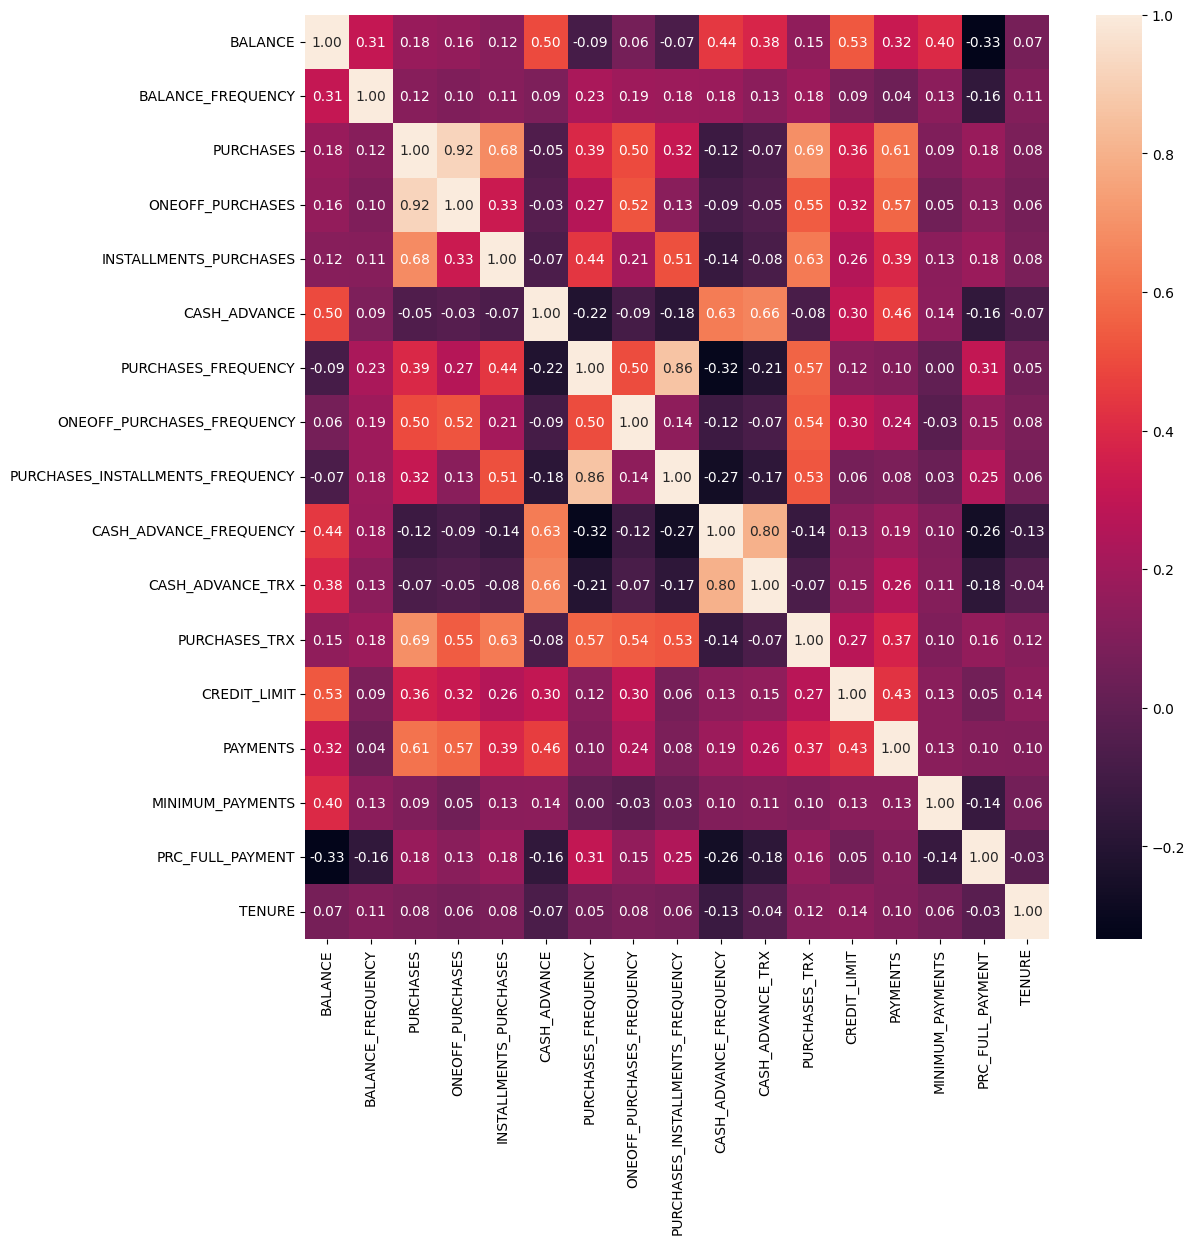

In [ ]:
plt.figure(figsize= (12,12))
sb.heatmap(data = data.corr(numeric_only = True), annot = True, fmt = '0.2f')
plt.show()

In [ ]:
# Para el tema de colinealidad

# Eliminar:
# PURCHASES
# PURCHASES_FREQUENCY
# CASH_ADVANCE_FREQUENCY

# **Paso 6**
- Completar o eliminar registros o variables
- Volver "entendibles" los datos para el modelo

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# Ignorar las variables de baja predictibilidad}
data = data.drop(columns = ['CUST_ID']) # Variable irrelevante para el modelo
data_mod = data.drop(columns = ['PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'])
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8628 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8628 non-null   float64
 1   BALANCE_FREQUENCY                 8628 non-null   float64
 2   ONEOFF_PURCHASES                  8628 non-null   float64
 3   INSTALLMENTS_PURCHASES            8628 non-null   float64
 4   CASH_ADVANCE                      8628 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY        8628 non-null   float64
 6   PURCHASES_INSTALLMENTS_FREQUENCY  8628 non-null   float64
 7   CASH_ADVANCE_TRX                  8628 non-null   int64  
 8   PURCHASES_TRX                     8628 non-null   int64  
 9   CREDIT_LIMIT                      8628 non-null   float64
 10  PAYMENTS                          8628 non-null   float64
 11  MINIMUM_PAYMENTS                  8628 non-null   float64
 12  PRC_FULL_PA

In [ ]:
# Pipeline de transformación de datos
num_cols = data_mod.select_dtypes(include = ['int64', 'float64']).columns.to_list()
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_cols)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['BALANCE', 'BALANCE_FREQUENCY',
                                  'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                  'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                                  'PURCHASES_INSTALLMENTS_FREQUENCY',
                                  'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                  'CREDIT_LIMIT', 'PAYMENTS',
                                  'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                                  'TENURE'])])

In [ ]:
data_pre = preprocessor.fit_transform(data_mod)
data_pro = pd.DataFrame(data_pre, columns = num_cols)
data_pro

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.000000,0.004240,0.000000,0.000000,0.083333,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.136685,0.000000,0.000000,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.018968,0.000000,0.000000,1.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000393,0.000000,0.000000,0.083333,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.000000,0.059257,0.000000,0.000000,0.583333,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,0.000308,0.500000,0.000513,0.000000,0.000000,0.166667,0.000000,0.00000,0.002793,0.015025,0.001155,0.000569,0.000000,0.0
8624,0.001496,1.000000,0.000000,0.012939,0.000000,0.000000,0.833333,0.00000,0.016760,0.031720,0.006418,0.000640,0.500000,0.0
8625,0.001229,0.833333,0.000000,0.006418,0.000000,0.000000,0.666667,0.00000,0.013966,0.031720,0.001601,0.001078,0.250000,0.0
8626,0.000707,0.833333,0.000000,0.000000,0.000776,0.000000,0.000000,0.01626,0.000000,0.015025,0.001035,0.000729,0.250000,0.0


# Paso 7: Modelado


In [ ]:
from sklearn.cluster import KMeans

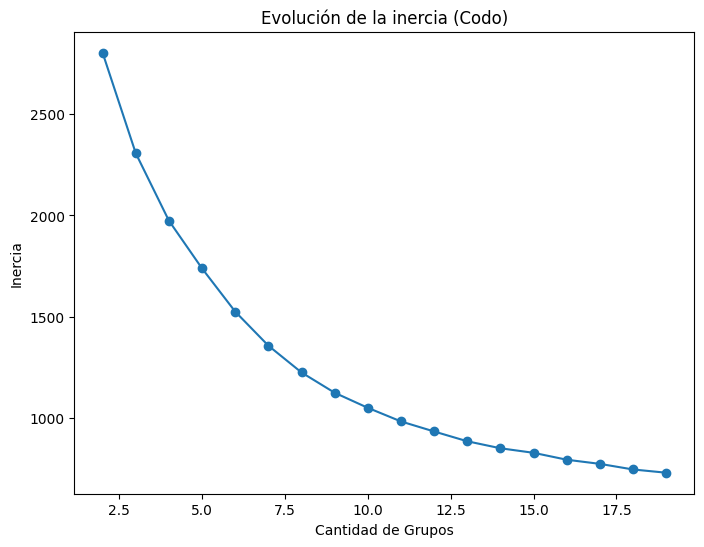

In [ ]:
cluster_range = range(2, 20)
inertia = []
for n_cluster in cluster_range:
    kmeans_model = KMeans(n_clusters = n_cluster,
                          n_init = 20,
                          random_state = 123)
    kmeans_model.fit(data_pro)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize = (8, 6))
plt.plot(cluster_range, inertia, marker = 'o')
plt.title('Evolución de la inercia (Codo)')
plt.xlabel('Cantidad de Grupos')
plt.ylabel('Inercia')
plt.show()

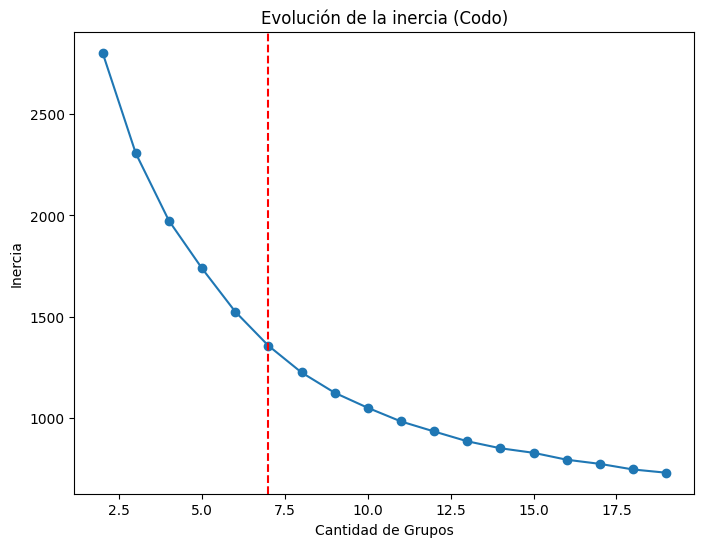

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(cluster_range, inertia, marker = 'o')
plt.axvline(x = 7, linestyle = 'dashed', color = 'red')
plt.title('Evolución de la inercia (Codo)')
plt.xlabel('Cantidad de Grupos')
plt.ylabel('Inercia')
plt.show()

In [ ]:
kmeans_final_model = KMeans(n_clusters = 7, random_state = 123, n_init = 20)
kmeans_final_model.fit(data_pro)

KMeans(n_clusters=7, n_init=20, random_state=123)

In [ ]:
kmeans_final_model.cluster_centers_

array([[9.77527206e-03, 4.12341260e-01, 6.14122328e-03, 4.94866930e-03,
        1.21620357e-02, 7.72290841e-02, 1.19912723e-01, 9.74381912e-03,
        9.78708274e-03, 1.32021666e-01, 3.25206999e-02, 2.45635425e-03,
        2.39936716e-01, 9.64401294e-01],
       [1.29681883e-01, 9.88781862e-01, 7.39515647e-02, 6.85605077e-02,
        1.53168571e-02, 8.13742118e-01, 8.66190142e-01, 2.24044482e-02,
        1.80898029e-01, 2.58222516e-01, 8.78439381e-02, 1.23083656e-02,
        2.56431069e-01, 9.84674330e-01],
       [1.16914011e-01, 9.76668767e-01, 5.29996222e-03, 3.15606543e-03,
        3.23789395e-02, 7.62679448e-02, 6.27044058e-02, 4.31102252e-02,
        7.60968436e-03, 1.42126785e-01, 3.06740897e-02, 1.40502542e-02,
        2.17422988e-02, 9.80297359e-01],
       [6.88764283e-02, 8.27957516e-01, 6.55498020e-03, 5.29031588e-03,
        3.57755170e-02, 1.23081144e-01, 2.08672945e-01, 3.89672843e-02,
        1.28150848e-02, 9.79790717e-02, 1.63106900e-02, 6.01024518e-03,
        7.856

In [ ]:
# Método Jerárquico Aglomerativo
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
# Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

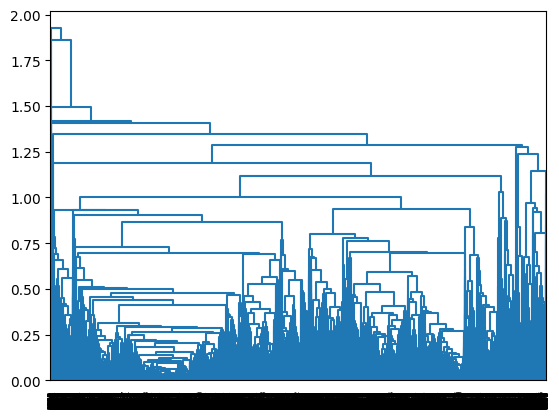

In [ ]:
# Promedio
h_clust_avg = AgglomerativeClustering(metric = 'euclidean', linkage = 'average', distance_threshold = 0, n_clusters = None)
h_clust_avg.fit(X = data_pro)
dibujarDendrograma(h_clust_avg, color_threshold = 0)

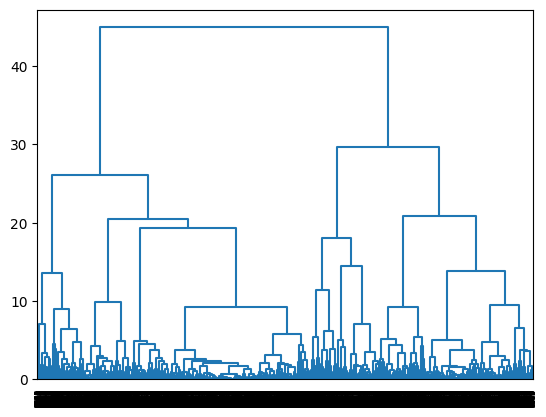

In [ ]:
# Varianza
h_clust_var = AgglomerativeClustering(metric = 'euclidean', linkage = 'ward', distance_threshold = 0, n_clusters = None)
h_clust_var.fit(X = data_pro)
dibujarDendrograma(h_clust_var, color_threshold = 0)

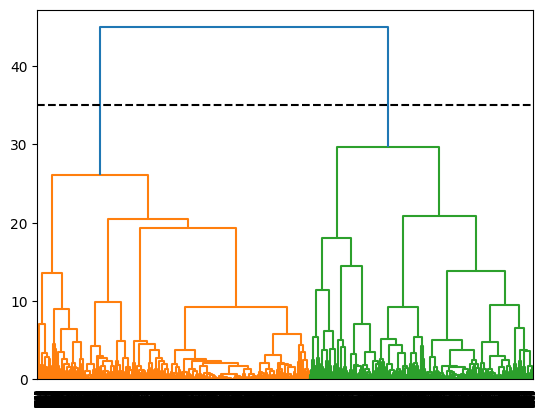

In [ ]:
dendrogram_prun = 35
dibujarDendrograma(h_clust_var, color_threshold = dendrogram_prun)
plt.axhline(y = dendrogram_prun, linestyle = '--', c = 'black')
plt.show()

In [ ]:
h_cluster_final = AgglomerativeClustering(metric = 'euclidean', linkage = 'ward', n_clusters = 2)
h_cluster_final.fit(data_pro)

AgglomerativeClustering()

In [ ]:
# Método DBScan
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

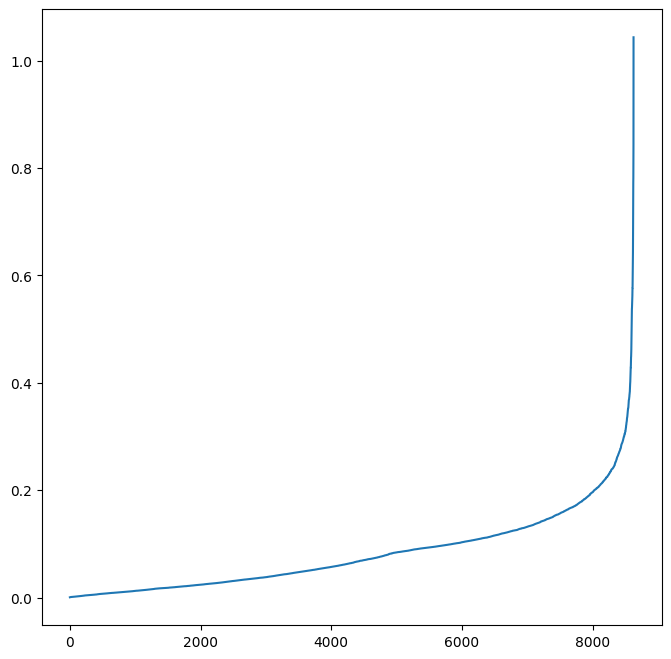

In [ ]:
neighbors = NearestNeighbors()
neighbors_fit = neighbors.fit(data_pro)
distance, index = neighbors_fit.kneighbors(data_pro)
distance = np.sort(distance, axis = 0)
distance = distance[:, 1]
plt.figure(figsize = (8, 8))
plt.plot(distance)
plt.show()

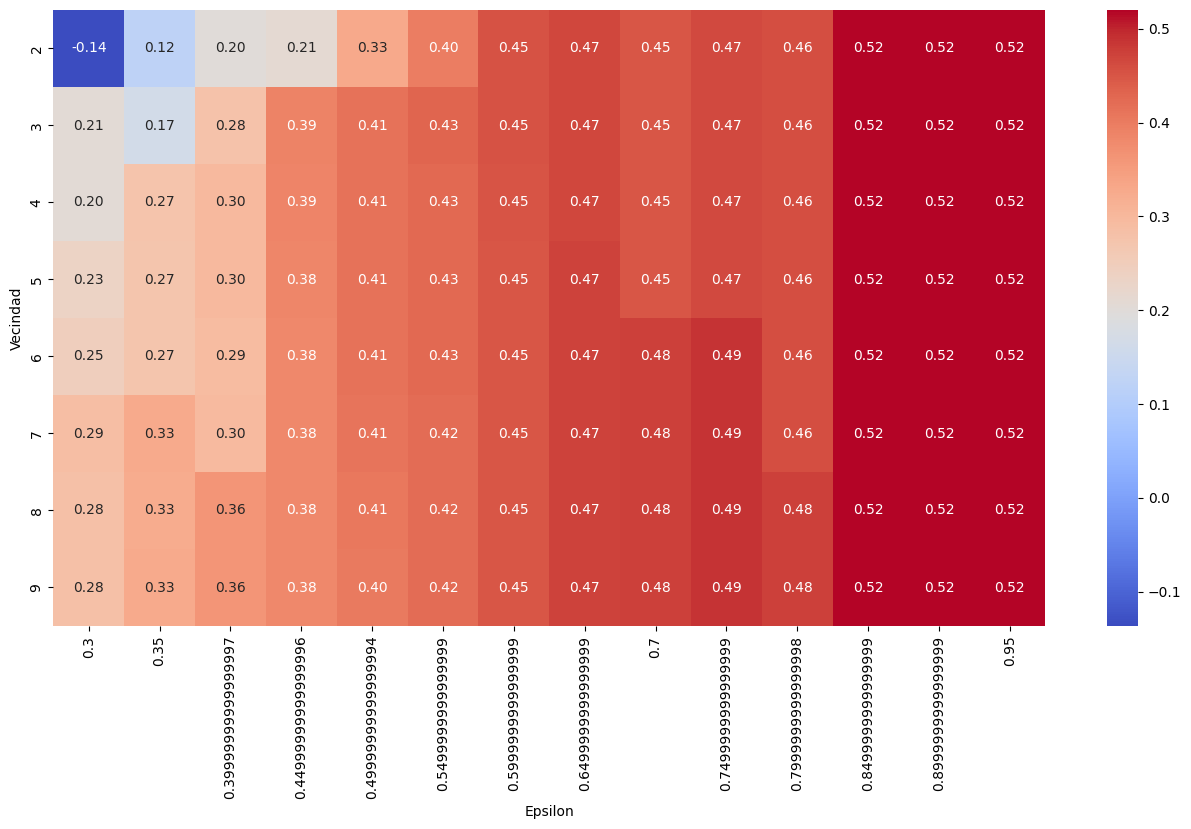

In [ ]:
from sklearn.metrics import silhouette_score
eps_values = np.arange(0.3, 1, 0.05)
samples = np.arange(2, 10)
dbscan_params = list(product(eps_values, samples))
sil_scores = []
for p in dbscan_params:
    y_pred = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(data_pro)
    sil_scores.append(silhouette_score(data_pro, y_pred))

df_param_adj = pd.DataFrame.from_records(dbscan_params, columns = ['Epsilon', 'Vecindad'])
df_param_adj['Score'] = sil_scores
pivot_data = pd.pivot_table(df_param_adj, values = 'Score', index = 'Vecindad', columns = 'Epsilon')
plt.figure(figsize = (16, 8))
sb.heatmap(pivot_data, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [ ]:
dbscan_final = DBSCAN(eps = 0.85, min_samples = 2)
dbscan_final.fit(data_pro)

DBSCAN(eps=0.85, min_samples=2)

### GMM

In [ ]:
from sklearn.mixture import GaussianMixture

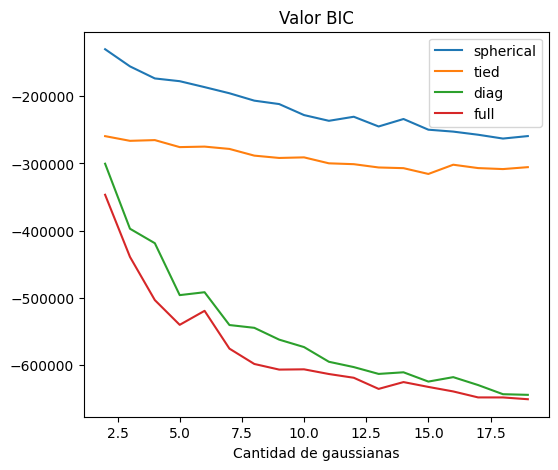

In [ ]:
fig, axes = plt.subplots(figsize = (6,5))
n_gauss = range(2,20)
var_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in var_types:
    valor_bic = []
    for i in n_gauss:
        model = GaussianMixture(n_components = i, covariance_type = covariance_type)
        model = model.fit(data_pro)
        valor_bic.append(model.bic(data_pro))
    plt.plot(n_gauss, valor_bic, label = covariance_type)
axes.set_title('Valor BIC')
axes.set_xlabel('Cantidad de gaussianas')
axes.legend()
plt.show()

In [ ]:
gmm_final = GaussianMixture(n_components = 17, covariance_type = 'full')
gmm_final.fit(data_pro)

GaussianMixture(n_components=17)

# Paso 8: Evaluación del Modelo

Aplicar el indice de Silhouette a todos los modelos indentificados. Va asi:
- Si es < 0 es porque tiene demasiado solapamiento de grupos
- Si es > 0 y cercano a 1 es minima varianza entre grupos
- Si > 0 y cercano a 0 es maxima varianza entre grupos

In [ ]:
# Indentificar, a la luz de cada modelo el grupo al que pertenece

labels_kmeans = kmeans_final_model.predict(data_pro)
labels_hclust = h_cluster_final.fit_predict(data_pro)
labels_dbscan = dbscan_final.fit_predict(data_pro)
labels_gmm = gmm_final.predict(data_pro)

In [ ]:
# Indices de silhouette para cada modelo
sil_kmeans = silhouette_score(data_pro, labels_kmeans)
sil_h = silhouette_score(data_pro, labels_hclust)
sil_dbscan = silhouette_score(data_pro, labels_dbscan)
sil_gmm = silhouette_score(data_pro, labels_gmm)
print(f'El indice de Silhouette para KMeans: {sil_kmeans:.2f}')
print(f'El indice de Silhouette para Hierarchical Clustering: {sil_h:.2f}')
print(f'El indice de Silhouette para DBSCAN: {sil_dbscan:.1f}')
print(f'El indice de Silhouette para GMM: {sil_gmm:.1f}')

El indice de Silhouette para KMeans: 0.36
El indice de Silhouette para Hierarchical Clustering: 0.27
El indice de Silhouette para DBSCAN: 0.5
El indice de Silhouette para GMM: -0.1


In [ ]:
# identificar cuantos grupos genera dbscan

np.unique(labels_dbscan)

array([-1,  0])

In [ ]:
data_pro_dbscan = data_pro.copy()
data_pro_dbscan['DBSCAN'] = labels_dbscan
data_pro_dbscan.DBSCAN.value_counts()

,count
DBSCAN,
0,8627
-1,1


### Modelo Seleccionado: KMeans de 7 grupos

In [ ]:
centers = pd.DataFrame(kmeans_final_model.cluster_centers_)
centers.columns = num_cols
centers

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.009775,0.412341,0.006141,0.004949,0.012162,0.077229,0.119913,0.009744,0.009787,0.132022,0.032521,0.002456,0.239937,0.964401
1,0.129682,0.988782,0.073952,0.068561,0.015317,0.813742,0.866190,0.022404,0.180898,0.258223,0.087844,0.012308,0.256431,0.984674
2,0.116914,0.976669,0.005300,0.003156,0.032379,0.076268,0.062704,0.043110,0.007610,0.142127,0.030674,0.014050,0.021742,0.980297
3,0.068876,0.827958,0.006555,0.005290,0.035776,0.123081,0.208673,0.038967,0.012815,0.097979,0.016311,0.006010,0.078568,0.215342
4,0.082214,0.952338,0.007206,0.035289,0.014419,0.105399,0.838729,0.018944,0.062189,0.132132,0.030220,0.016745,0.055889,0.975005
5,0.006272,0.893046,0.006063,0.039329,0.000881,0.086660,0.787159,0.000887,0.052264,0.135304,0.025045,0.002515,0.807532,0.902331
6,0.081174,0.967958,0.043937,0.006695,0.013255,0.764137,0.126396,0.017260,0.063222,0.190549,0.043980,0.008891,0.245211,0.975309


In [ ]:
num_inverse_transformer = preprocessor.named_transformers_['num']['scaler']
cent_num_inverse = num_inverse_transformer.inverse_transform(centers[num_cols])
transformed_centers = pd.DataFrame(cent_num_inverse, columns=num_cols)
transformed_centers

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,186.151860,0.412341,250.323937,111.345059,573.284452,0.077229,0.119913,1.198490,3.503776,4004.048903,1649.546040,187.699828,0.239937,11.786408
1,2469.550061,0.988782,3014.358218,1542.611422,721.993939,0.813742,0.866190,2.755747,64.761494,7783.764368,4455.620006,940.454467,0.256431,11.908046
2,2226.409719,0.976669,216.033085,71.011472,1526.252928,0.076268,0.062704,5.302558,2.724267,4306.697197,1555.883323,1073.545533,0.021742,11.881784
3,1311.623368,0.827958,267.189187,119.032107,1686.358119,0.123081,0.208673,4.792976,4.587800,2984.473198,827.351098,459.239089,0.078568,7.292052
4,1565.617580,0.952338,293.739994,793.999849,679.668637,0.105399,0.838729,2.330162,22.263570,4007.342309,1532.830362,1279.434954,0.055889,11.850028
5,119.436646,0.893046,247.124839,884.906965,41.509432,0.086660,0.787159,0.109091,18.710490,4102.357491,1270.370036,192.211129,0.807532,11.413986
6,1545.798249,0.967958,1790.943016,150.641495,624.820007,0.764137,0.126396,2.123016,22.633598,5756.940837,2230.759983,679.326248,0.245211,11.851852


# **¿Se rechaza la hipótesis nula?**

In [ ]:
kmeans_hipothesis_model = KMeans(n_clusters = 4, random_state = 123, n_init = 20)
kmeans_hipothesis_model.fit(data_pro)

KMeans(n_clusters=4, n_init=20, random_state=123)

In [ ]:
labels_kmeans_hipothesis = kmeans_hipothesis_model.predict(data_pro)

In [ ]:
sil_kmeans_hipothesis = silhouette_score(data_pro, labels_kmeans_hipothesis)
print(f'El indice de Silhouette para KMeans: {sil_kmeans:.2f}')
print(f'El indice de Silhouette para KMeans hipótesis: {sil_kmeans_hipothesis:.2f}')

El indice de Silhouette para KMeans: 0.36
El indice de Silhouette para KMeans hipótesis: 0.35


# **Por una diferencia ínfima**
Se rechaza la hipotésis nula